In [1]:
!pip install tensorflow-gpu==1.14.0 keras==2.2.4 numpy scikit-learn

50000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6

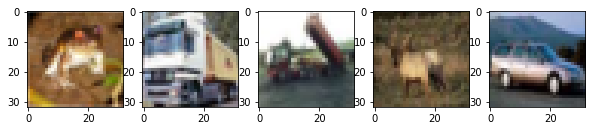

In [4]:
import numpy as np
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

NB_EPOCH = 10
BATCH_SIZE = 128
NB_CLASSES = 10
VALIDATION_SPLIT = 0.2
NB_CHANNELS, IMG_ROWS, IMG_COLS = 3, 32, 32
INPUT_SHAPE = (NB_CHANNELS, IMG_ROWS, IMG_COLS)
OPTIMIZER = RMSprop()

K.set_image_dim_ordering("th")

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

plt.figure(figsize=(10, 10))
cols = 5

for i in range(cols):
  plt.subplot(5 / cols + 1, cols, i + 1)
  plt.imshow(np.transpose(X_train[i], (1, 2, 0)))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

model = Sequential([
  Conv2D(32, kernel_size=3, padding='same', input_shape=INPUT_SHAPE),
  Activation("relu"),

  Conv2D(32, kernel_size=3, padding='same'),
  Activation('relu'),

  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.25),

  Conv2D(64, kernel_size=(3, 3), padding='same'),
  Activation('relu'),

  Conv2D(64, (3, 3)),
  Activation('relu'),

  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.25),

  Flatten(),
  Dense(512),
  Activation("relu"),
  Dropout(0.5),

  Dense(NB_CLASSES),
  Activation("softmax"),
])

model.summary()

model.compile(
  loss="categorical_crossentropy",
  optimizer=OPTIMIZER,
  metrics=["accuracy"]
)

Epoch 1/10
391/390 [==============================] - 21s 53ms/step - loss: 1.9424 - acc: 0.2900
Epoch 2/10
391/390 [==============================] - 21s 53ms/step - loss: 1.6701 - acc: 0.3947
Epoch 3/10
391/390 [==============================] - 21s 53ms/step - loss: 1.5356 - acc: 0.4492
Epoch 4/10
391/390 [==============================] - 21s 53ms/step - loss: 1.4466 - acc: 0.4819
Epoch 5/10
391/390 [==============================] - 21s 53ms/step - loss: 1.3861 - acc: 0.5023
Epoch 6/10
391/390 [==============================] - 21s 53ms/step - loss: 1.3410 - acc: 0.5205
Epoch 7/10
391/390 [==============================] - 21s 54ms/step - loss: 1.3121 - acc: 0.5347
Epoch 8/10
391/390 [==============================] - 21s 53ms/step - loss: 1.2798 - acc: 0.5469
Epoch 9/10
391/390 [==============================] - 21s 53ms/step - loss: 1.2575 - acc: 0.5575
Epoch 10/10
10000/10000 [==============================] - 1s 89us/step
Test score:  1.1584428533554076
Test accuracy:  0.6244


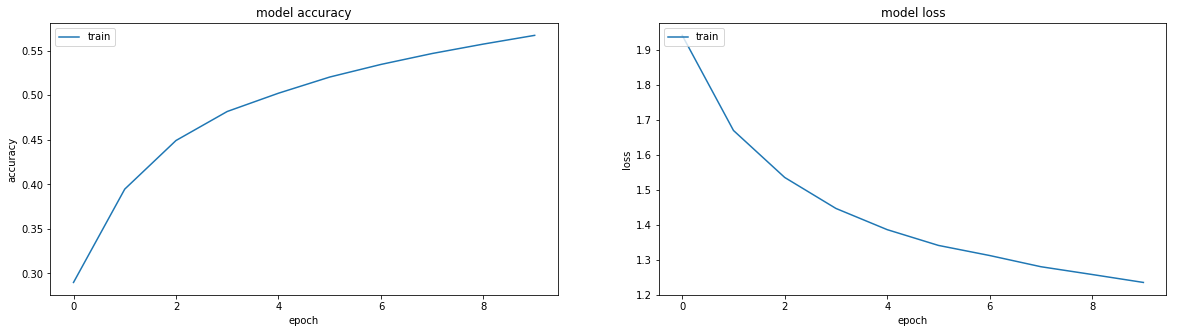

In [5]:
datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

datagen.fit(X_train)

history = model.fit_generator(
  datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
  steps_per_epoch=X_train.shape[0]/BATCH_SIZE,
  epochs=NB_EPOCH
)

score = model.evaluate(X_test, y_test)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()